
# <font color="#8333ff"><center>Produisez une étude de marché avec R ou Python</center></font>

## Sommaire :

**Partie 1 : Clustering**
- <a href="#C11">1. La classification ascendante hiérarchique de données</a>
- <a href="#C12">2. Utilisation des K-means</a>
- <a href="#C13">2.1. Using the elbow method</a>
- <a href="#C14">2.2. Silhouette score Method to find ‘k’ number of clusters</a>
- <a href="#C15">2.3. Clusters </a>
- <a href="#C16">2.4 Visualisation des clusters </a>
- <a href="#C17">2.5 Les pays de chaque cluster </a>
- <a href="#C18">2.6 Comparer les résultats des deux méthodes de clustering</a>

**Partie 2 : Caractérisation des classes d'individus issues de la classification**
- <a href="#C19">1. La variable qui caractérise mieux la partition</a>
- <a href="#C20">2. Caractériser les classes par les variables </a>
- <a href="#C21">3. Analyser les centroïdes de classes </a>

**Recomendation**

## Imports

In [953]:
# Import des librairies.
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import math as mt
from scipy.stats import chi2
from matplotlib.collections import LineCollection
sns.set()
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
import scipy.stats as stats


In [954]:
# Chargement des données
Df_modifie = pd.read_csv("Df_modifie.csv")
X_proj = pd.read_csv("X_proj.csv")

## **Partie 2 : Clustering**

In [955]:
# Enregister les pays dans une variable nommée names
names = Df_modifie.Zone.values
# Enregister les colonnes dans une variable nommée features
features = Df_modifie.drop(columns= 'Zone').columns

### <a name="C11">1. La classification ascendante hiérarchique de données</a>

Une première approche consiste à utiliser la Classification Ascendante Hiérarchique (CAH). Le graphe qui en résulte permet de se faire une idée visuelle des différents regroupements et d’intuiter le nombre de classes. Les variables étant toutes numériques, nous utiliserons la distance euclidienne comme mesure de dissimilarité et la distance de “Ward” comme mesure de dissimilarité inter-classe (cette distance vise à maximiser l’inertie inter-classe)

In [956]:
# calculer les distances
data = X_proj.copy(deep = True)
Z = linkage(data, method="ward")
Z[:5]

array([[5.40000000e+01, 1.52000000e+02, 2.29993914e-02, 2.00000000e+00],
       [1.90000000e+01, 1.28000000e+02, 3.53272267e-02, 2.00000000e+00],
       [8.50000000e+01, 1.47000000e+02, 3.68764782e-02, 2.00000000e+00],
       [2.70000000e+01, 1.64000000e+02, 5.49127341e-02, 2.00000000e+00],
       [7.90000000e+01, 1.39000000e+02, 6.49556189e-02, 2.00000000e+00]])

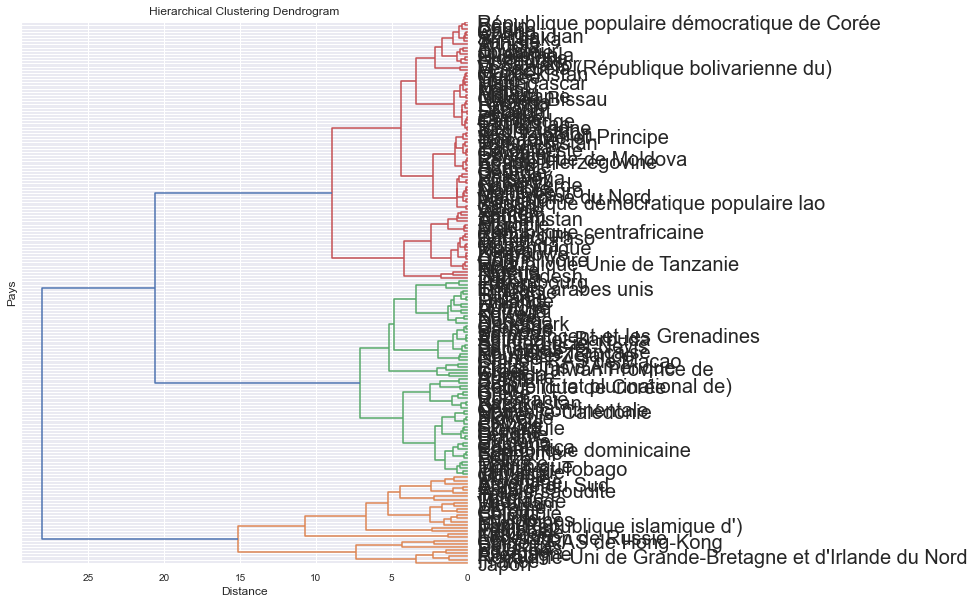

In [957]:
# Afficher le dendrogramme
fig, ax = plt.subplots(1, 1, figsize=(8,10))

_ = dendrogram(Z, ax=ax, labels=names, orientation = "left")

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Pays")
ax.tick_params(axis='x', which='major', labelsize=10)
ax.tick_params(axis='y', which='major', labelsize=20)


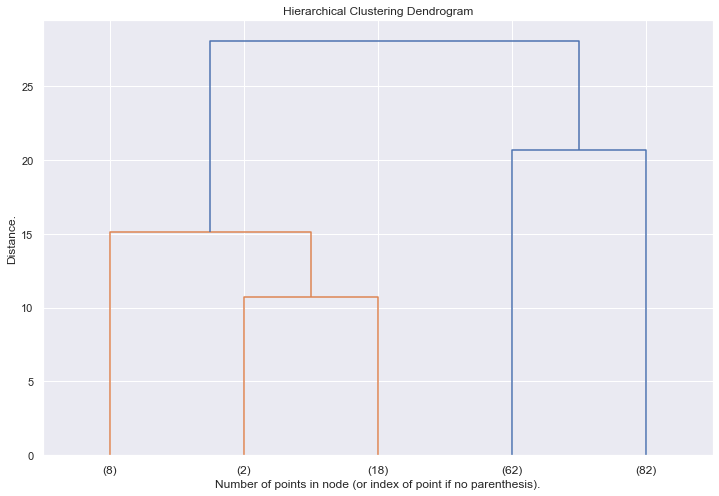

In [958]:
# Afficher une découpe de dendrogramme
# les arguments p=5, truncate_mode="lastp" signifient que l'on ne va afficher que 5 clusters
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=5, truncate_mode="lastp", ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

In [959]:
cah = AgglomerativeClustering(n_clusters=4, linkage="ward")
# On entraine
cah.fit(data)
# Classification
cah.labels_

array([1, 0, 1, 1, 3, 1, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2, 3, 2, 2, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 0, 2, 1, 2, 2, 3, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 0, 0, 1, 2, 2, 2, 0, 2, 3, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 1, 0, 2, 1, 3, 0, 3, 2, 2, 0, 2, 3, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1,
       2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 1], dtype=int64)

In [960]:
# Renommer les clusters
dd = {i:j for i,j in enumerate(list("abcd"))}
labels = [dd[i] for i in cah.labels_]
labels[:10]

['b', 'a', 'b', 'b', 'd', 'b', 'c', 'a', 'a', 'b']

In [961]:
# Créer une variable cluster
data.columns = list(x_list)
data["cluster"] = labels
data.head()

,1,2,3,cluster
0,-0.910534,2.780861,0.742935,b
1,3.613991,0.289536,-0.919501,a
2,-0.981961,-0.240914,-0.151972,b
3,-0.483322,1.380250,0.184746,b
4,5.333392,-1.475108,2.695155,d


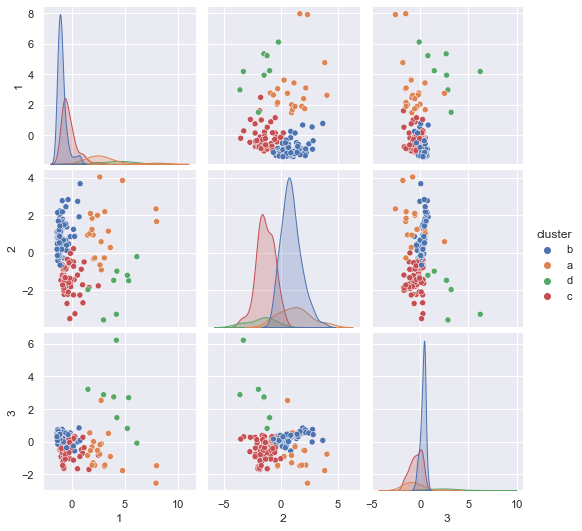

In [962]:
sns.pairplot(data, hue="cluster")

In [963]:
cluster_a = data.loc[data['cluster']== 'a']
cluster_b = data.loc[data['cluster']== 'b']
cluster_c = data.loc[data['cluster']== 'c']
cluster_d = data.loc[data['cluster']== 'd']

In [964]:
pays_cluster_a_CAH = []
for element in np.array(cluster_a.index):
    pays_cluster_a_CAH = pays_cluster_a_CAH +[Df.iloc[element]['Zone']]
print(pays_cluster_a_CAH)

['Afrique du Sud', 'Arabie saoudite', 'Argentine', 'Colombie', 'Espagne', 'Fédération de Russie', 'Indonésie', "Iran (République islamique d')", 'Italie', 'Malaisie', 'Mexique', 'Myanmar', 'Pakistan', 'Philippines', 'Pérou', 'Thaïlande', 'Turquie', 'Ukraine', 'Viet Nam', 'Égypte']


In [965]:
pays_cluster_b_CAH = []
for element in np.array(cluster_b.index):
    pays_cluster_b_CAH = pays_cluster_b_CAH +[Df.iloc[element]['Zone']]
print(pays_cluster_b_CAH)

['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Arménie', 'Azerbaïdjan', 'Bangladesh', 'Bosnie-Herzégovine', 'Botswana', 'Burkina Faso', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Congo', "Côte d'Ivoire", 'Djibouti', 'El Salvador', 'Eswatini', 'Gabon', 'Gambie', 'Ghana', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Géorgie', 'Haïti', 'Honduras', 'Inde', 'Iraq', 'Jordanie', 'Kenya', 'Kirghizistan', 'Kiribati', 'Lesotho', 'Liban', 'Libéria', 'Macédoine du Nord', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Maroc', 'Mauritanie', 'Mongolie', 'Monténégro', 'Mozambique', 'Namibie', 'Nicaragua', 'Niger', 'Nigéria', 'Népal', 'Ouganda', 'Ouzbékistan', 'Paraguay', 'Rwanda', 'République centrafricaine', 'République de Moldova', 'République démocratique populaire lao', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Sao Tomé-et-Principe', 'Serbie', 'Sierra Leone', 'Soudan', 'Sri Lanka', 'Sénégal', 'Tadjikistan', 'Tchad', 'Timor-Leste', 'Togo', 'Tunisie', 'Turkménist

In [966]:
pays_cluster_c_CAH = []
for element in np.array(cluster_c.index):
    pays_cluster_c_CAH = pays_cluster_c_CAH +[Df.iloc[element]['Zone']]
print(pays_cluster_c_CAH)

['Antigua-et-Barbuda', 'Australie', 'Autriche', 'Bahamas', 'Barbade', 'Belize', 'Bolivie (État plurinational de)', 'Brésil', 'Bulgarie', 'Bélarus', 'Canada', 'Chili', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Chine, continentale', 'Chypre', 'Costa Rica', 'Croatie', 'Cuba', 'Danemark', 'Dominique', 'Estonie', 'Fidji', 'Finlande', 'Grenade', 'Grèce', 'Guyana', 'Hongrie', 'Irlande', 'Islande', 'Israël', 'Jamaïque', 'Kazakhstan', 'Koweït', 'Lettonie', 'Lituanie', 'Luxembourg', 'Malte', 'Maurice', 'Norvège', 'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Oman', 'Panama', 'Polynésie française', 'Portugal', 'Roumanie', 'République de Corée', 'République dominicaine', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa', 'Slovaquie', 'Slovénie', 'Suisse', 'Suriname', 'Suède', 'Tchéquie', 'Trinité-et-Tobago', 'Émirats arabes unis', "États-Unis d'Amérique"]


In [967]:
pays_cluster_d_CAH = []
for element in np.array(cluster_d.index):
    pays_cluster_d_CAH = pays_cluster_d_CAH +[Df.iloc[element]['Zone']]
print(pays_cluster_d_CAH)

['Allemagne', 'Belgique', 'Chine - RAS de Hong-Kong', 'France', 'Japon', 'Pays-Bas', 'Pologne', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


### <a name="C12">2. Utilisation des K-means</a>


Nous aurions pu nous servir des résultats de la CAH précédente pour choisir la valeur de k. Mais nous allons plutôt observer la décroissance de l’inertie intra-classe pour déterminer la “meilleure” valeur de k. En effet, en traçant la courbe de l’inertie intra-classe en fonction de k, nous cherchons alors à identifier les étapes où l’on observe une rupture dans la décroissance de cette courbe.

### <a name="C13">2.1. Using the elbow method</a>

In [968]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 11)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(init = 'k-means++',n_clusters=k)
    
    # On entraine
    kmeans.fit(X_proj)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

C:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0.5, 1.0, 'L’inertie intra-classe en fonction du nombre de cluster')

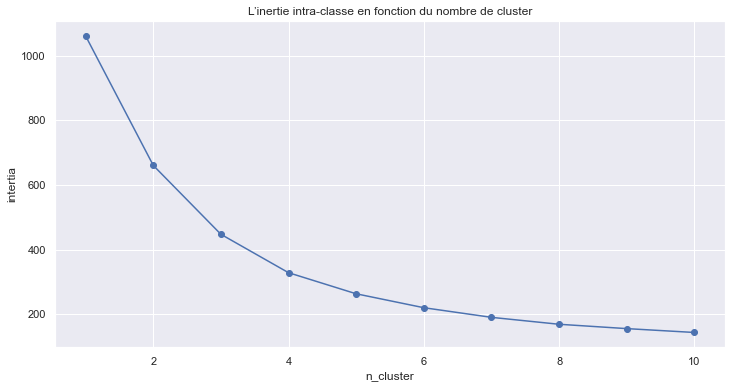

In [969]:
# Plotting scree plot to find optimum number of clusters
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia_list, marker ='o')
plt.title('L’inertie intra-classe en fonction du nombre de cluster')

Le nombre de clusters augmente, la variance diminue. Le coude à 4 ou 5 clusters représente l'équilibre le plus parcimonieux entre la minimisation du nombre de clusters et la minimisation de la variance au sein de chaque cluster, nous pouvons donc choisir une valeur de k égale à 4 ou 5

### <a name="C14">2.2. Silhouette score Method to find ‘k’ number of clusters</a>

La valeur de silhouette est une mesure de la similarité d'un objet avec son propre cluster (cohésion) par rapport à d'autres clusters (séparation). La silhouette va de -1 à +1, où une valeur élevée indique que l'objet est bien adapté à son propre cluster et mal adapté aux clusters voisins. Si la plupart des objets ont une valeur élevée, la configuration de clustering est appropriée. Si de nombreux points ont une valeur faible ou négative, la configuration de clustering peut avoir trop ou trop peu de clusters.

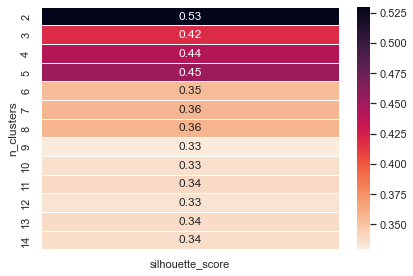

In [970]:

from sklearn.metrics import silhouette_samples, silhouette_score
clusters_range = range(2,15)
results =[]
for c in clusters_range :
    clusterer = KMeans(init='k-means++', n_clusters=c, n_init =100,random_state=0)
    cluster_labels = clusterer.fit_predict(pd.DataFrame(X_proj))
    silhouette_avg =silhouette_score(pd.DataFrame(X_proj), cluster_labels)
    results.append([c,silhouette_avg])
result = pd.DataFrame(results, columns= ['n_clusters','silhouette_score'])
pivot_Km = pd.pivot_table(result, index='n_clusters', values = 'silhouette_score')
plt.figure()
sns.heatmap(pivot_Km, annot =True, linewidths= .5,  cmap=sns.cm.rocket_r)
plt.tight_layout()


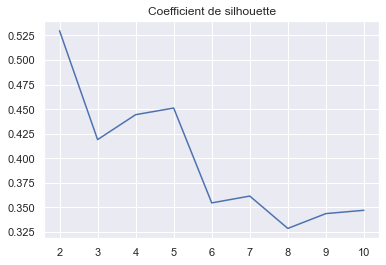

In [971]:
# Coefficient de silhouette
Tab_silhouette =[]
fig, ax = plt.subplots()
for i in range(2,11) :
    Kmeans = KMeans(n_clusters=i)
    cluster_labels = Kmeans.fit_predict(pd.DataFrame(X_proj))
    Tab_silhouette.append(silhouette_score(pd.DataFrame(X_proj),cluster_labels))
ax.plot(range(2,11), Tab_silhouette)
ax.set_title('Coefficient de silhouette')
ax.grid(True)
plt.show()

### <a name="C15">2.3 Clusters</a>

In [972]:
# Classification par K-Means
Data = X_proj.copy(deep = True)
# On instancie un k-means pour 4 clusters
kmeans = KMeans(n_clusters= 4 ,random_state=0)
# On entraine
kmeans.fit(Data)
kmeans.labels_

array([1, 2, 1, 1, 0, 1, 3, 2, 2, 1, 3, 3, 1, 3, 1, 3, 0, 3, 3, 1, 1, 3,
       3, 1, 1, 1, 3, 1, 1, 3, 3, 0, 3, 3, 1, 3, 2, 1, 3, 3, 3, 1, 3, 1,
       3, 1, 2, 3, 1, 3, 3, 0, 2, 3, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 2, 2, 1, 3, 3, 3, 2, 3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3,
       1, 1, 2, 1, 1, 1, 3, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 3,
       1, 3, 1, 1, 2, 3, 1, 0, 2, 0, 3, 3, 2, 3, 0, 1, 1, 3, 1, 3, 1, 1,
       1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 0, 1, 1,
       3, 1, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 3, 1, 3, 1, 1])

In [973]:
# Renommer les clusters
dd = {i:j for i,j in enumerate(list("abcde"))}
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['b', 'c', 'b', 'b', 'a', 'b', 'd', 'c', 'c', 'b']

In [974]:
Data.columns = list(x_list)
Data["cluster"] = labels
Data.head()

,1,2,3,cluster
0,-0.910534,2.780861,0.742935,b
1,3.613991,0.289536,-0.919501,c
2,-0.981961,-0.240914,-0.151972,b
3,-0.483322,1.380250,0.184746,b
4,5.333392,-1.475108,2.695155,a


### <a name="C16">2.4 Visualisation de clusters</a>

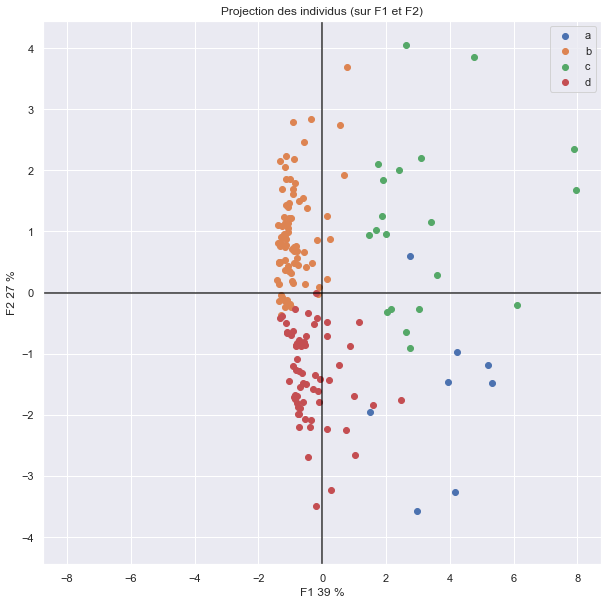

In [975]:
# Affichage  de la projection des individus sur le plan(F1,F2)
classe = Data["cluster"].tolist()
x_y = (0,1)
display_factorial_planes(Data.copy(deep = True), x_y, pca, clusters = classe,figsize=(10,10), marker="o")

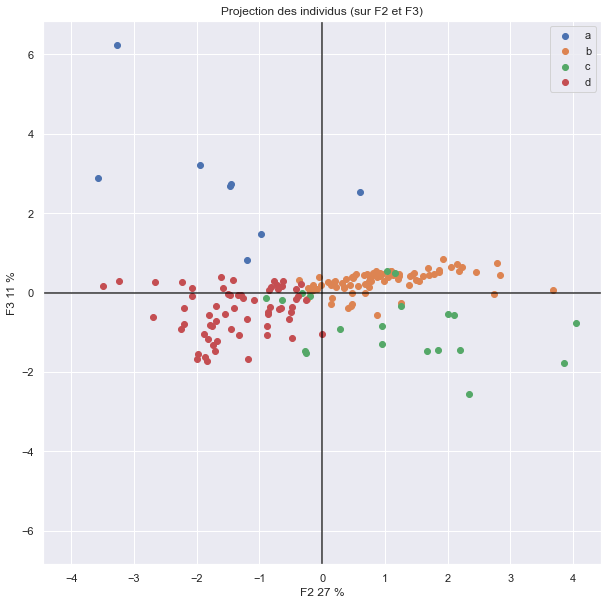

In [976]:
# Affichage  de la projection des individus sur le plan(F2,F3) 
x_y = (1,2)
display_factorial_planes(Data.copy(deep = True), x_y, pca, clusters = classe,figsize=(10,10), marker="o")

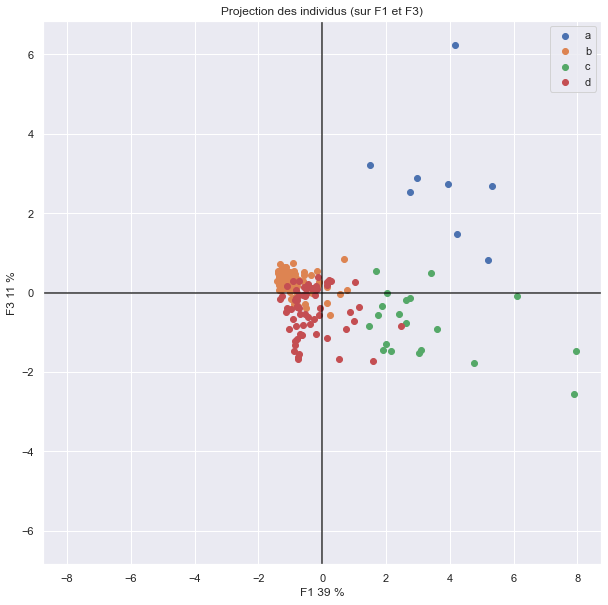

In [977]:
# Affichage  de la projection des individus sur le plan(F1,F3) 
x_y = (0,2)
display_factorial_planes(Data.copy(deep = True), x_y, pca, clusters = classe,figsize=(10,10), marker="o")

In [978]:
#centroids 
print(kmeans.cluster_centers_)

[[ 3.76320152 -1.66109973  2.81866464]
 [-0.89649554  0.93697914  0.28916206]
 [ 3.25819005  1.15425185 -0.81878698]
 [-0.35957578 -1.36018333 -0.46977308]]


Text(0, 0.5, 'F2')

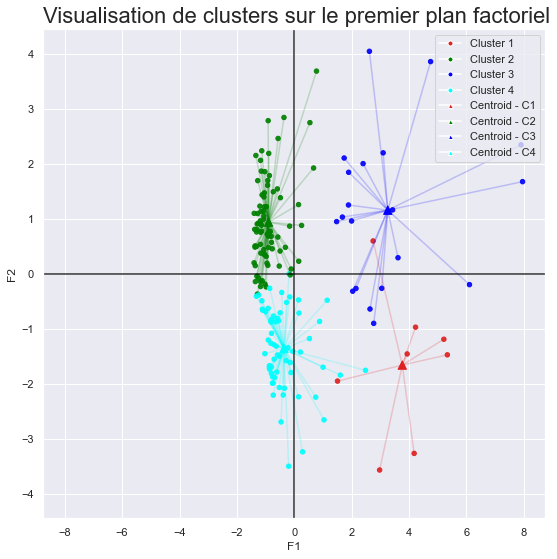

In [979]:
# Visualisation de clusters et de centroids
### BUILD A TWO DIMENSIONS CLUSTER ###
# k means
df= X_proj.copy(deep = True)
kmeans = KMeans(n_clusters=4,random_state=0)
df['cluster'] = kmeans.fit_predict(df)
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2],3:cen_y[3],})
# define and map colors
colors = ['#DF2020', '#008000','#0000FF','#00FFFF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], })
#####PLOT#####
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(9,9))
# plot data
plt.scatter(df['0'], df['1'], c=df.c, alpha = 0.9, s=20)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot lines
for idx, val in df.iterrows():
    x = [val[0], val.cen_x,]
    y = [val[1], val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

## centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# add all elements to the same list
legend_elements.extend(cent_leg)
# Valeur x max et y max
x_max = np.abs(df.iloc[:, 0]).max() *1.1
y_max = np.abs(df.iloc[:, 1]).max() *1.1

# On borne x et y 
ax.set_xlim(left=-x_max, right=x_max)
ax.set_ylim(bottom= -y_max, top=y_max)

# Affichage des lignes horizontales et verticales
plt.plot([-x_max, x_max], [0, 0], color='black', alpha=0.8)
plt.plot([0,0], [-y_max, y_max], color='black', alpha=0.8)

# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('Visualisation de clusters sur le premier plan factoriel', loc='left', fontsize=22)
plt.xlabel('F1')
plt.ylabel('F2')

Text(0, 0.5, 'F3')

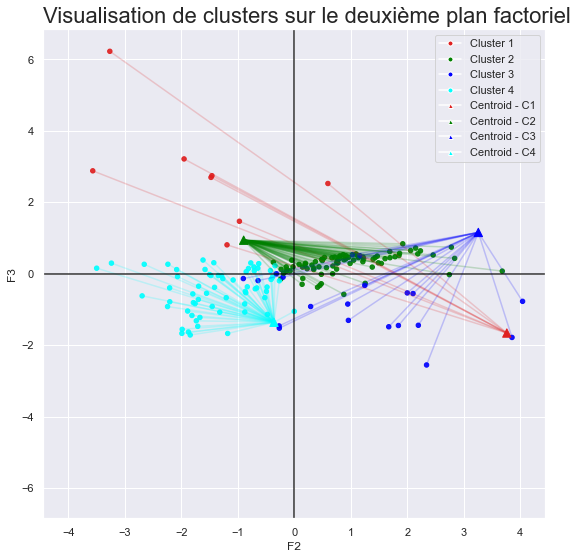

In [980]:
### BUILD A TWO DIMENSIONS CLUSTER ###
# k means
df = pd.DataFrame(X_proj)
kmeans = KMeans(n_clusters=4,random_state=0)
df['cluster'] = kmeans.fit_predict(df)
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2],3:cen_y[3],})
# define and map colors
colors = ['#DF2020', '#008000','#0000FF','#00FFFF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], })
#####PLOT#####
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(9,9))
# plot data
plt.scatter(df['1'], df['2'], c=df.c, alpha = 0.9, s=20)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot lines
for idx, val in df.iterrows():
    x = [val[1], val.cen_x,]
    y = [val[2], val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

## centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# add all elements to the same list
legend_elements.extend(cent_leg)
# Valeur x max et y max
x_max = np.abs(df.iloc[:, 1]).max() *1.1
y_max = np.abs(df.iloc[:, 2]).max() *1.1

# On borne x et y 
ax.set_xlim(left=-x_max, right=x_max)
ax.set_ylim(bottom= -y_max, top=y_max)

# Affichage des lignes horizontales et verticales
plt.plot([-x_max, x_max], [0, 0], color='black', alpha=0.8)
plt.plot([0,0], [-y_max, y_max], color='black', alpha=0.8)

# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('Visualisation de clusters sur le deuxième plan factoriel', loc='left', fontsize=22)
plt.xlabel('F2')
plt.ylabel('F3')

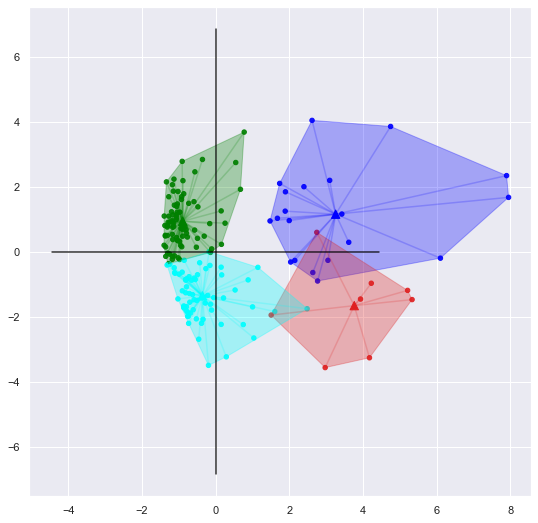

In [981]:
from scipy.spatial import ConvexHull
fig, ax = plt.subplots(1, figsize=(9,9))
# plot data
plt.scatter(df['0'], df['1'], c=df.c, alpha = 0.9, s=20)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot lines
for idx, val in df.iterrows():
    x = [val[0], val.cen_x,]
    y = [val[1], val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
# Affichage des lignes horizontales et verticales
plt.plot([-x_max, x_max], [0, 0], color='black', alpha=0.8)
plt.plot([0,0], [-y_max, y_max], color='black', alpha=0.8)    
# draw enclosure
for i in df.cluster.unique():
    points = df[df.cluster == i][['0', '1']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
    

### <a name="C17">2.5 Les pays de chaque cluster</a>

In [1012]:
cluster_d = Data.loc[Data['cluster'] == 'd']
cluster_b = Data.loc[Data['cluster'] == 'b']
cluster_c = Data.loc[Data['cluster'] == 'c']
cluster_a = Data.loc[Data['cluster'] == 'a']


In [1013]:
# Les pays de cluster_a_KM
pays_cluster_a_KM = []
for element in np.array(cluster_a.index):
    pays_cluster_a_KM = pays_cluster_a_KM +[Df.iloc[element]['Zone']]
print(pays_cluster_a_KM)
print(len(pays_cluster_a_KM))

['Allemagne', 'Belgique', 'Chine - RAS de Hong-Kong', 'France', 'Pays-Bas', 'Pologne', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Thaïlande']
8


In [1014]:
# Les pays de cluster_b_KM
pays_cluster_b_KM = []
for element in np.array(cluster_b.index):
    pays_cluster_b_KM = pays_cluster_b_KM +[Df.iloc[element]['Zone']]
print(pays_cluster_b_KM)
print(len(pays_cluster_b_KM))

['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Arménie', 'Azerbaïdjan', 'Bangladesh', 'Bosnie-Herzégovine', 'Botswana', 'Burkina Faso', 'Bélarus', 'Bénin', 'Cambodge', 'Cameroun', 'Chine, continentale', 'Congo', "Côte d'Ivoire", 'Djibouti', 'El Salvador', 'Eswatini', 'Gambie', 'Ghana', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Géorgie', 'Haïti', 'Honduras', 'Inde', 'Iraq', 'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Lesotho', 'Liban', 'Libéria', 'Macédoine du Nord', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Maroc', 'Mauritanie', 'Mongolie', 'Monténégro', 'Mozambique', 'Namibie', 'Nicaragua', 'Niger', 'Nigéria', 'Népal', 'Ouganda', 'Ouzbékistan', 'Paraguay', 'Rwanda', 'République centrafricaine', 'République de Moldova', 'République démocratique populaire lao', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Sao Tomé-et-Principe', 'Serbie', 'Sierra Leone', 'Soudan', 'Sri Lanka', 'Sénégal', 'Tadjikistan', 'Tchad', 'Timor-Leste', 'Togo', 'Tunisie'

In [1015]:
# Les pays de cluster_c_KM
pays_cluster_c_KM = []
for element in np.array(cluster_c.index):
    pays_cluster_c_KM = pays_cluster_c_KM +[Df.iloc[element]['Zone']]
print(pays_cluster_c_KM)
print(len(pays_cluster_c_KM))

['Afrique du Sud', 'Arabie saoudite', 'Argentine', 'Colombie', 'Espagne', 'Fédération de Russie', 'Indonésie', "Iran (République islamique d')", 'Italie', 'Japon', 'Malaisie', 'Mexique', 'Myanmar', 'Pakistan', 'Philippines', 'Pérou', 'Turquie', 'Ukraine', 'Viet Nam', 'Égypte']
20


In [1016]:
# Les pays de cluster_d_KM
pays_cluster_d_KM = []
for element in np.array(cluster_d.index):
    pays_cluster_d_KM = pays_cluster_d_KM +[Df.iloc[element]['Zone']]
print(pays_cluster_d_KM)
print(len(pays_cluster_d_KM))

['Antigua-et-Barbuda', 'Australie', 'Autriche', 'Bahamas', 'Barbade', 'Belize', 'Bolivie (État plurinational de)', 'Brésil', 'Bulgarie', 'Cabo Verde', 'Canada', 'Chili', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Chypre', 'Costa Rica', 'Croatie', 'Cuba', 'Danemark', 'Dominique', 'Estonie', 'Fidji', 'Finlande', 'Gabon', 'Grenade', 'Grèce', 'Guyana', 'Hongrie', 'Irlande', 'Islande', 'Israël', 'Jamaïque', 'Kiribati', 'Koweït', 'Lettonie', 'Lituanie', 'Luxembourg', 'Malte', 'Maurice', 'Norvège', 'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Oman', 'Panama', 'Polynésie française', 'Portugal', 'Roumanie', 'République de Corée', 'République dominicaine', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa', 'Slovaquie', 'Slovénie', 'Suisse', 'Suriname', 'Suède', 'Tchéquie', 'Trinité-et-Tobago', 'Uruguay', 'Émirats arabes unis', "États-Unis d'Amérique"]
63


### <a name="C18">2.6 Comparer les résultats des deux méthodes de clustering</a>

In [1017]:
def Comparaison(list1,list2):
    liste_differences1 =[]
    liste_differences2 =[] 
    for i in list1:
        if i not in list2:
            liste_differences1.append(i)
    for j in list2:            
        if j not in list1:
            liste_differences2.append(j)
    print(liste_differences1)
    print(liste_differences2) 

In [1018]:
Comparaison(pays_cluster_a_KM, pays_cluster_d_CAH)

['Thaïlande']
['Japon']


In [1019]:
Comparaison(pays_cluster_d_KM, pays_cluster_c_CAH)

['Cabo Verde', 'Gabon', 'Kiribati', 'Uruguay']
['Bélarus', 'Chine, continentale', 'Kazakhstan']


In [1020]:
Comparaison(pays_cluster_c_KM, pays_cluster_a_CAH)

['Japon']
['Thaïlande']


In [1021]:
Comparaison(pays_cluster_b_KM, pays_cluster_b_CAH)

['Bélarus', 'Chine, continentale', 'Kazakhstan']
['Cabo Verde', 'Gabon', 'Kiribati', 'Uruguay']


 <div class="alert alert-block alert-info">
Les résultats de clustering par la méthode CAH et ceux de K_means sont les mêmes sauf pour 9 pays.<br>
On a une différence de 5% entre les résultats des deux méthodes de clustering.    
</div>


## **Partie 3 : Caractérisation des classes d'individus issues de la classification**

### <a name="C19">1. La variable qui caractérise mieux la partition</a>

Pour chaque variable quantitative on va construire un modèle d'analyse de variance de la variable quantitative qui est la variable réponse en fonction la variable de classe qui est la variable explicative.<br>L'ANOVA est un test paramétrique ainsi certaines conditions doivent être remplies pour que les résultats du test soient considérés comme fiables.<br>
pour nous on va opter pour un ANOVA non paramétriquele (test de Kruskal Wallis) 

In [1022]:
# Renommer les colonne
Data = Data.rename(columns = {1:"Facteur social"})
Data = Data.rename(columns = {2:"Facteur stabilité"})
Data = Data.rename(columns = {3:"Facteur légal"})

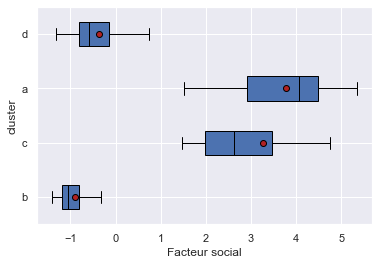

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


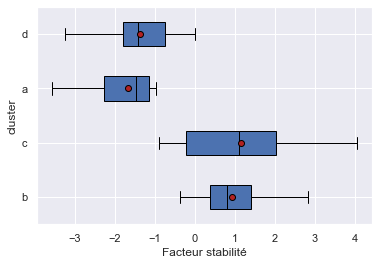

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


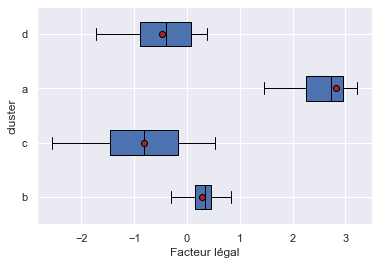

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [1023]:
# Visualisation
variable_list = ["Facteur social","Facteur stabilité","Facteur légal"]
for variable in variable_list:
    X = "cluster" # qualitative
    Y = variable # quantitative
    modalites = Data['cluster'].unique()
    groupes = []
    for m in modalites:
        groupes.append(Data[Data['cluster'] == m][Y])

    # Propriétés graphiques    
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
    plt.boxplot(groupes,labels = modalites,  showfliers = False, medianprops = medianprops, 
            vert = False, patch_artist = True, showmeans= True, meanprops = meanprops)
    plt.xlabel(variable)
    plt.ylabel('cluster')
    plt.show()
    print("-"*100)
    print("-"*100)

 <div class="alert alert-block alert-info">
Il semble qu'il y ait des différences distinctes entre les groupes. Effectuons donc un test ANOVA non paramétrique pour prouver si c'est le cas.<br>    
</div>


In [1024]:
cluster_d = Data.loc[Data['cluster'] == 'd']
cluster_b = Data.loc[Data['cluster'] == 'b']
cluster_c = Data.loc[Data['cluster'] == 'c']
cluster_a = Data.loc[Data['cluster'] == 'a']


In [1025]:
# L'ANOVA non paramétrique (test de Kruskal Wallis)
    # Définir les hypothèses :
        # hypothèse nulle : il n'y a pas de différence entre les  groupes (toutes les moyennes sont égales)
        # hypothèse alternative : il y a différence entre au moins deux groupes (toutes les moyennes ne sont pas égales)

variable_list = ["Facteur social","Facteur stabilité","Facteur légal"]
for variable in variable_list: 
    group1 = cluster_a[variable].sample(7)
    group2 = cluster_b[variable].sample(7)
    group3 = cluster_c[variable].sample(7)
    group4 = cluster_d[variable].sample(7)
    
    #perform Kruskal-Wallis Test 
    print('le resultat de test pour la variable', variable, 'est:\n', stats.kruskal(group1, group2, group3,group4))
    print("============================================================================================================")

le resultat de test pour la variable Facteur social est:
 KruskalResult(statistic=20.666432090077407, pvalue=0.00012347532261876127)
le resultat de test pour la variable Facteur stabilité est:
 KruskalResult(statistic=20.84377199155523, pvalue=0.00011344086166175884)
le resultat de test pour la variable Facteur légal est:
 KruskalResult(statistic=20.581984517945116, pvalue=0.00012855955045461604)


 <div class="alert alert-block alert-info">
La pvalue du test étant inférieure à 0.05, l’hypothèse de l’égalité des moyennes est rejetée. On conclut donc que les moyennes des groupes sont globalement différentes.<br>
Ainsi les variables et les classes ne sont pas indépendantes.<br>
La variable qui caractérise le mieux la partition est la variable 'Facteur social' qui a la probabilité critique la plus petite et qui permet donc de bien séparer les classes.    
</div>
 

### <a name="C20">2. Caractériser les classes par les variables</a>

Si les valeurs de la variable X pour la classe q semblent tirés au hasard parmi les valeurs de X alors la variable X ne caractérise pas la classe q car les individus de la classe q ne prennent pas de valeurs particulières.<br>
Au contraire si les valeurs de X semblent très particulières pour les individus de la classe q, alors on dit que la variable X caractérise la classe q.

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


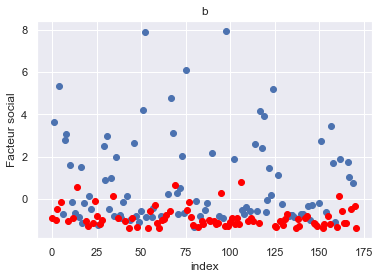

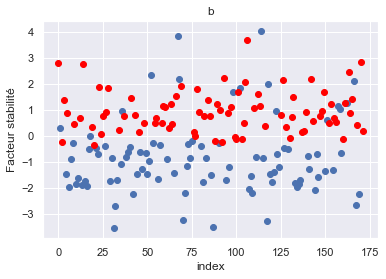

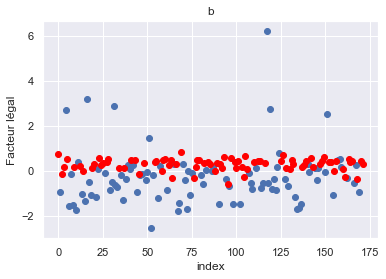

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


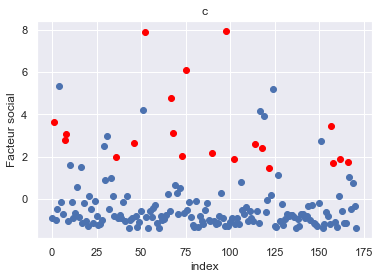

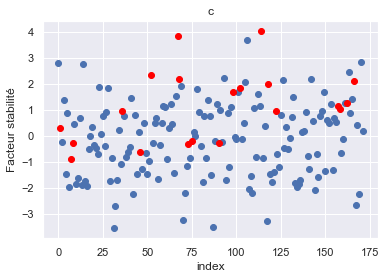

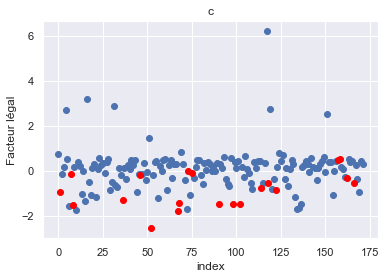

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


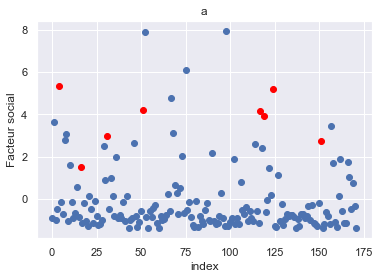

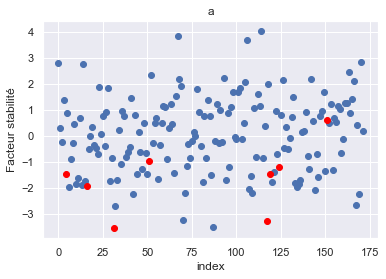

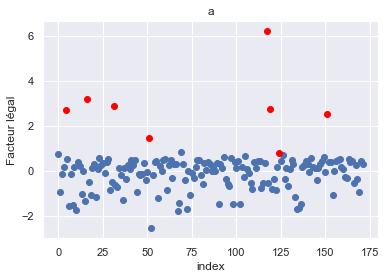

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


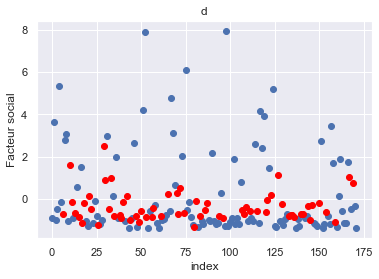

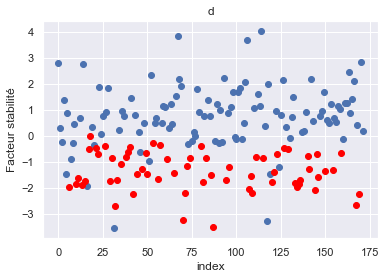

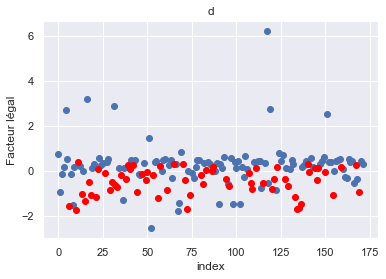

In [1026]:
# Visualisation de valeurs de variables pour les différentes classes.
cluster_list = Data.cluster.unique()
variable_list = ["Facteur social","Facteur stabilité","Facteur légal"]
for cluster in cluster_list:
    print("-"*100)
    print("-"*100)
    for variable in variable_list:
        data1 = Data.loc[Data['cluster'] == cluster][variable]
        data2 = Data.loc[Data['cluster'] != cluster][variable] 
        plt.scatter(data2.index, data2.values)
        plt.scatter(data1.index, data1.values,c='red')
        plt.title( cluster )
        plt.xlabel("index")
        plt.ylabel(variable)
        plt.show()
        

### <a name="C21">3. Analyser les centroïdes de classes</a>

In [1027]:
# Heatmap for interpretation
df = Data.copy(deep= True)
df = df.groupby('cluster').mean()
df

,Facteur social,Facteur stabilité,Facteur légal
cluster,,,
a,3.763202,-1.661100,2.818665
b,-0.896496,0.936979,0.289162
c,3.258190,1.154252,-0.818787
d,-0.359576,-1.360183,-0.469773


<AxesSubplot:ylabel='cluster'>

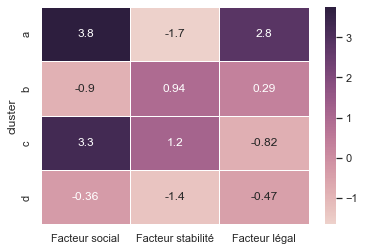

In [1028]:
# Visualisation
sns.heatmap(df, annot=True, linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True))

<div class="alert alert-block alert-info">
Cluster_a<br> 
Facteur social: Pays caractérisés par une grande production de volaille et une population importante.<br>
Facteur stabilité: stables économiquement, politiquement et une grande disponibilité alimentaire en volailles.<br>
Facteur légal: Ils font beaucoup d'échanges commerciaux externes.<br>
</div>  


In [1029]:
print(pays_cluster_a_KM)

['Allemagne', 'Belgique', 'Chine - RAS de Hong-Kong', 'France', 'Pays-Bas', 'Pologne', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Thaïlande']


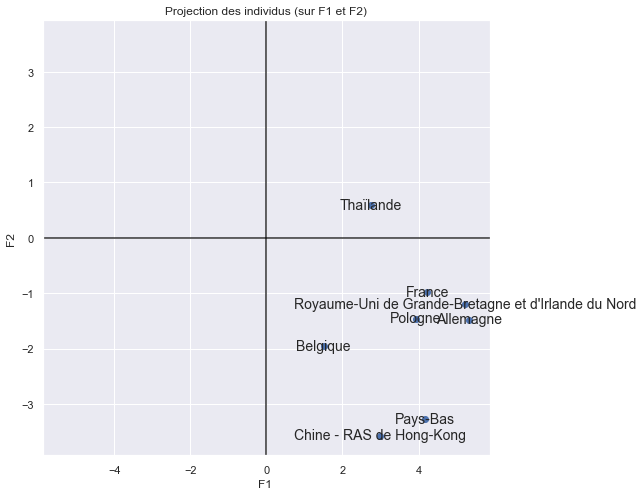

In [1030]:
# data split
features_a = cluster_a.drop(columns= 'cluster').columns
X_a = cluster_a.drop(columns= 'cluster').values
# Affichage  de la projection des individus de cluster a sur le plan(F1,F2) 
x_y = (0,1)
display_factorial_planes(X_a, x_y,labels = pays_cluster_a_KM, figsize=(8,8), marker="o")

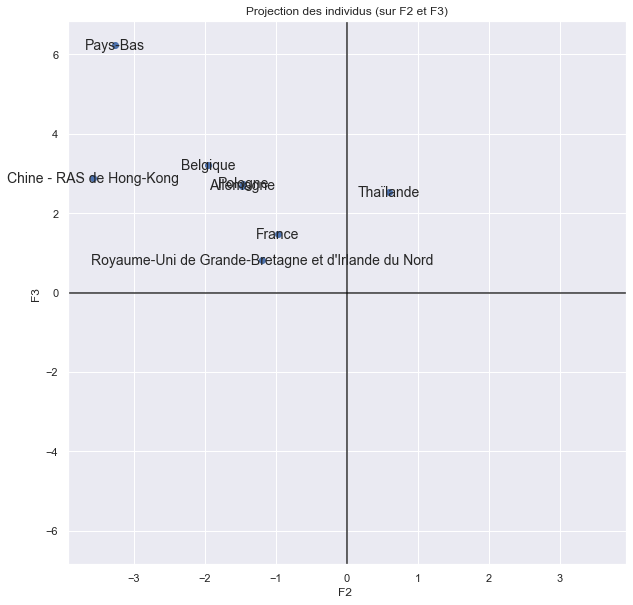

In [1031]:
# Affichage  de la projection des individus de cluster a sur le plan(F2,F3) 
x_y = (1,2)
display_factorial_planes(X_a, x_y,labels = pays_cluster_a_KM, figsize=(10,10), marker="o")

<div class="alert alert-block alert-info">
Cluster_b<br> 
Facteur social: Pays caractérisés par une faible production et pas une assez grande population.<br>
Facteur stabilité: Non stables économiquement, politiquement et n’ont pas de disponibilité alimentaire.<br>
Facteur légal: Ils font beaucoup d'échanges commerciaux externes de volailles.<br>
</div>  

In [1032]:
print(pays_cluster_b_KM)

['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Arménie', 'Azerbaïdjan', 'Bangladesh', 'Bosnie-Herzégovine', 'Botswana', 'Burkina Faso', 'Bélarus', 'Bénin', 'Cambodge', 'Cameroun', 'Chine, continentale', 'Congo', "Côte d'Ivoire", 'Djibouti', 'El Salvador', 'Eswatini', 'Gambie', 'Ghana', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Géorgie', 'Haïti', 'Honduras', 'Inde', 'Iraq', 'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Lesotho', 'Liban', 'Libéria', 'Macédoine du Nord', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Maroc', 'Mauritanie', 'Mongolie', 'Monténégro', 'Mozambique', 'Namibie', 'Nicaragua', 'Niger', 'Nigéria', 'Népal', 'Ouganda', 'Ouzbékistan', 'Paraguay', 'Rwanda', 'République centrafricaine', 'République de Moldova', 'République démocratique populaire lao', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Sao Tomé-et-Principe', 'Serbie', 'Sierra Leone', 'Soudan', 'Sri Lanka', 'Sénégal', 'Tadjikistan', 'Tchad', 'Timor-Leste', 'Togo', 'Tunisie'

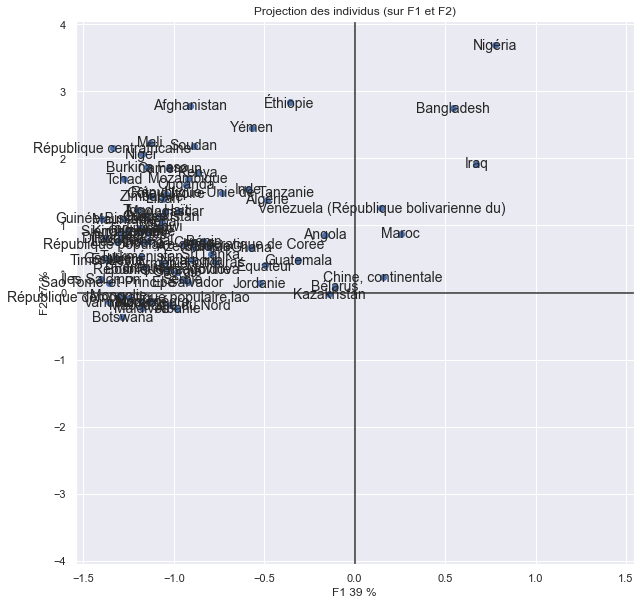

In [1033]:
# data split
features_b = cluster_b.drop(columns= 'cluster').columns
X_b = cluster_b.drop(columns= 'cluster').values
# Affichage  de la projection des individus de cluster b sur le plan(F1,F2) 
x_y = (0,1)
display_factorial_planes(X_b, x_y, pca, labels = pays_cluster_b_KM, figsize=(10,10), marker="o")

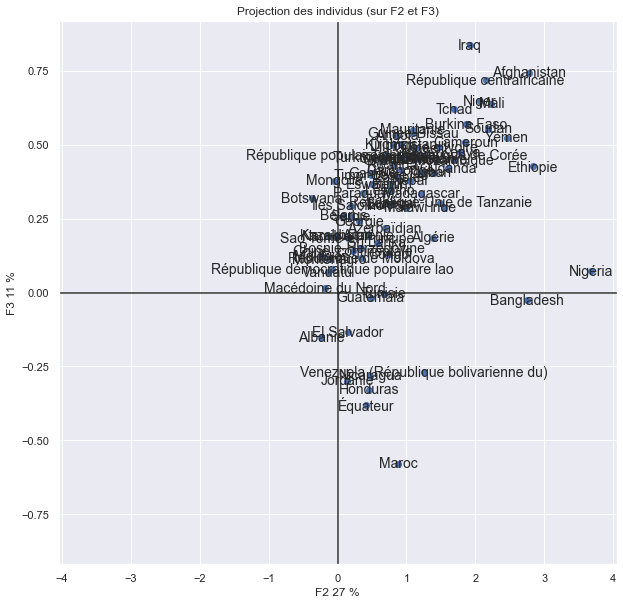

In [1034]:
# Affichage  de la projection des individus sur le plan(F2,F3) 
x_y = (1,2)
display_factorial_planes(X_b, x_y, pca, labels = pays_cluster_b_KM, figsize=(10,10), marker="o")

<div class="alert alert-block alert-info">
Cluster_c<br> 
Facteur social: Pays caractérisés par une grande production de volaille et une population importante.<br>
Facteur stabilité: Ne caractérise pas ce cluster.<br>
Facteur légal: Ils ne font pas beaucoup d'échanges de volailles externes. .<br>
</div>  


In [1035]:
print(pays_cluster_c_KM)

['Afrique du Sud', 'Arabie saoudite', 'Argentine', 'Colombie', 'Espagne', 'Fédération de Russie', 'Indonésie', "Iran (République islamique d')", 'Italie', 'Japon', 'Malaisie', 'Mexique', 'Myanmar', 'Pakistan', 'Philippines', 'Pérou', 'Turquie', 'Ukraine', 'Viet Nam', 'Égypte']


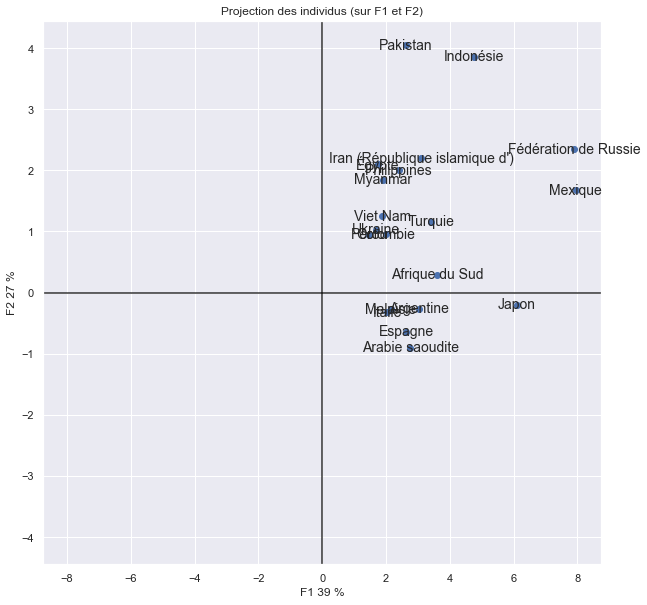

In [1036]:
# Data split
features_c = cluster_c.drop(columns= 'cluster').columns
X_c = cluster_c.drop(columns= 'cluster').values
# Affichage  de la projection des individus sur le plan(F1,F2) 
x_y = (0,1)
display_factorial_planes(X_c, x_y, pca, labels = pays_cluster_c_KM, figsize=(10,10), marker="o")

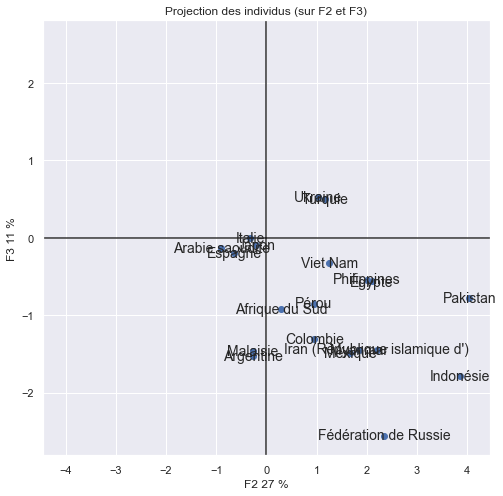

In [1037]:
# Affichage  de la projection des individus sur le plan(F2,F3) 
x_y = (1,2)
display_factorial_planes(X_c, x_y, pca, labels = pays_cluster_c_KM, figsize=(8,8), marker="o")

<div class="alert alert-block alert-info">
Cluster_d<br> 
Facteur social: Le facteur social ne caractérise pas ce cluster on peut dire d’après l'analyse de centroïde que la majorité ont une faible production et pas une assez grande population.<br>
Facteur stabilité: Stables économiquement, politiquement et ont une grande disponibilité alimentaire en volailles.<br>
Facteur légal: Majoritairement ils ne font pas beaucoup d'échanges de volailles externes.<br>
</div> 


In [1038]:
print(pays_cluster_d_KM)

['Antigua-et-Barbuda', 'Australie', 'Autriche', 'Bahamas', 'Barbade', 'Belize', 'Bolivie (État plurinational de)', 'Brésil', 'Bulgarie', 'Cabo Verde', 'Canada', 'Chili', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Chypre', 'Costa Rica', 'Croatie', 'Cuba', 'Danemark', 'Dominique', 'Estonie', 'Fidji', 'Finlande', 'Gabon', 'Grenade', 'Grèce', 'Guyana', 'Hongrie', 'Irlande', 'Islande', 'Israël', 'Jamaïque', 'Kiribati', 'Koweït', 'Lettonie', 'Lituanie', 'Luxembourg', 'Malte', 'Maurice', 'Norvège', 'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Oman', 'Panama', 'Polynésie française', 'Portugal', 'Roumanie', 'République de Corée', 'République dominicaine', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa', 'Slovaquie', 'Slovénie', 'Suisse', 'Suriname', 'Suède', 'Tchéquie', 'Trinité-et-Tobago', 'Uruguay', 'Émirats arabes unis', "États-Unis d'Amérique"]


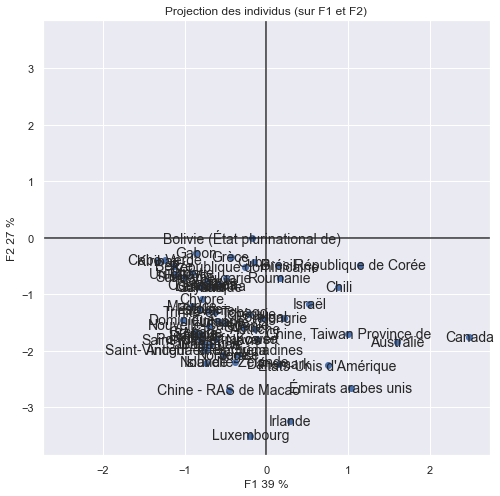

In [1039]:
# Data split
features_d = cluster_d.drop(columns= 'cluster').columns
X_d = cluster_d .drop(columns= 'cluster').values 
# Affichage  de la projection des individus sur le plan(F1,F2) 
x_y = (0,1)
display_factorial_planes(X_d, x_y, pca, labels = pays_cluster_d_KM, figsize=(8,8), marker="o")

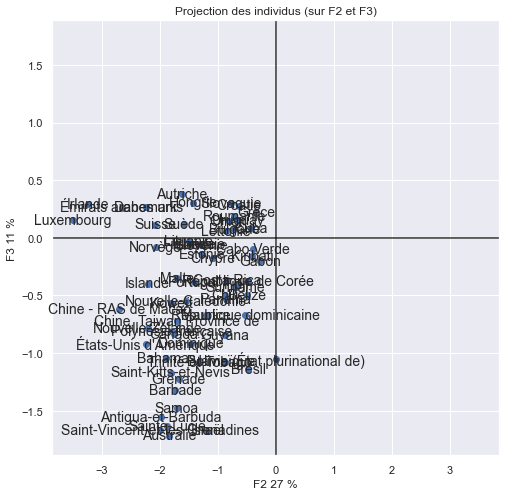

In [1040]:
# Affichage  de la projection des individus sur le plan(F2,F3) 
x_y = (1,2)
display_factorial_planes(X_d, x_y, pca, labels = pays_cluster_d_KM, figsize=(8,8), marker="o")

**Recomendation**<br>

**Le cluster b** reste très intéressent pour l’exportation de volailles de basse qualité et  de petit gabarit ( volaille à prix bas). Les pays de ce groupe consomment beaucoup les volailles ( beaucoup d’échange commercial  contre une faible disponibilité alimentaire) . Le principal facteur de succès de la volaille dans ces pays est le prix attractif.  Ce marché aujourd’hui est la destination des découpes congelées de poulet (ailes, cous …).<br>
**Cluster d** : En majorité il s’agit des pays riches à faible production, faible échange commerciale et une grande disponibilité en volailles . On peut comprendre qu’ en majorité dans ce cluster la viande de poulet n’est pas très consommée. Mais  la projection de cluster d sur le plan( F1,F2) montre que certains pays sortent du lot  et font beaucoup d’échanges commerciaux on peut donc  viser ces pays en commercialisant de la volaille de très bonne qualité ( ex: volailles élevés en plein air….).<br> 
**Cluster a** : On peut jouer la concurrence et la sûreté (Connaissances acquises via l’investissement en France qui appartient à ce cluster) en mettant en œuvre des stratégies de différenciation via l'élaboration des produits de très bonne qualité et  en lien avec une montée des attentes sociétales orientant la production vers une diversification et une montée en gamme des produits (bien-être animal, sans-antibiotiques, non-OGM, etc.)<br>
**Cluster c** : Grande production , peu d’échange. Emergence de certains pays de ce cluster comme de nouveaux acteurs sur le marché mondial, tels que l'Ukraine, la Turquie et la Russie pour lesquels les exportations ont plus que doublé depuis 2010. Pour ce cluster on a une grande variabilité entre les individus ,le facteur stabilité ne caractérise pas bien ce cluster et certains pays demeurent intéressants comme (l’Arabie- Saoudite l’Espagne….)
